<a href="https://colab.research.google.com/github/yprice93/credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

First, we are going to download the dataset from Kaggle.

In [7]:
! pip install -q kaggle
! pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'yelinprice'
os.environ['KAGGLE_KEY'] = 'b5d8a1618e875a55946db39a88f2f84c'

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

 77% 51.0M/66.0M [00:00<00:00, 125MB/s]
100% 66.0M/66.0M [00:00<00:00, 122MB/s]


In [ ]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


# Import Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [9]:
cc = pd.read_csv('creditcard.csv')

In [10]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
print(len(cc.columns))

31


In [12]:
print(len(cc))

284807


There are a total of 31 columns and 284,807 rows. We can use class column as the target variable and other columns as features. All columns except class columns are linear variables.

### Check NULLs

First, we will check NULLs.

In [13]:
# check for nulls in all columns
null_counts = cc.isnull().sum()

print(null_counts)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There is no null values.

### Check if dataset is imbalanced

As noted in the dataset description, this dataset is imbalanced and we are going to check just how imbalanced the dataset is.

In [14]:
# Compute the count of each class in the target variable
class_counts = cc['Class'].value_counts()

# Analyze the class distribution
print(class_counts)

0    284315
1       492
Name: Class, dtype: int64


### Plot Heatmap 

Plot a heatmap.

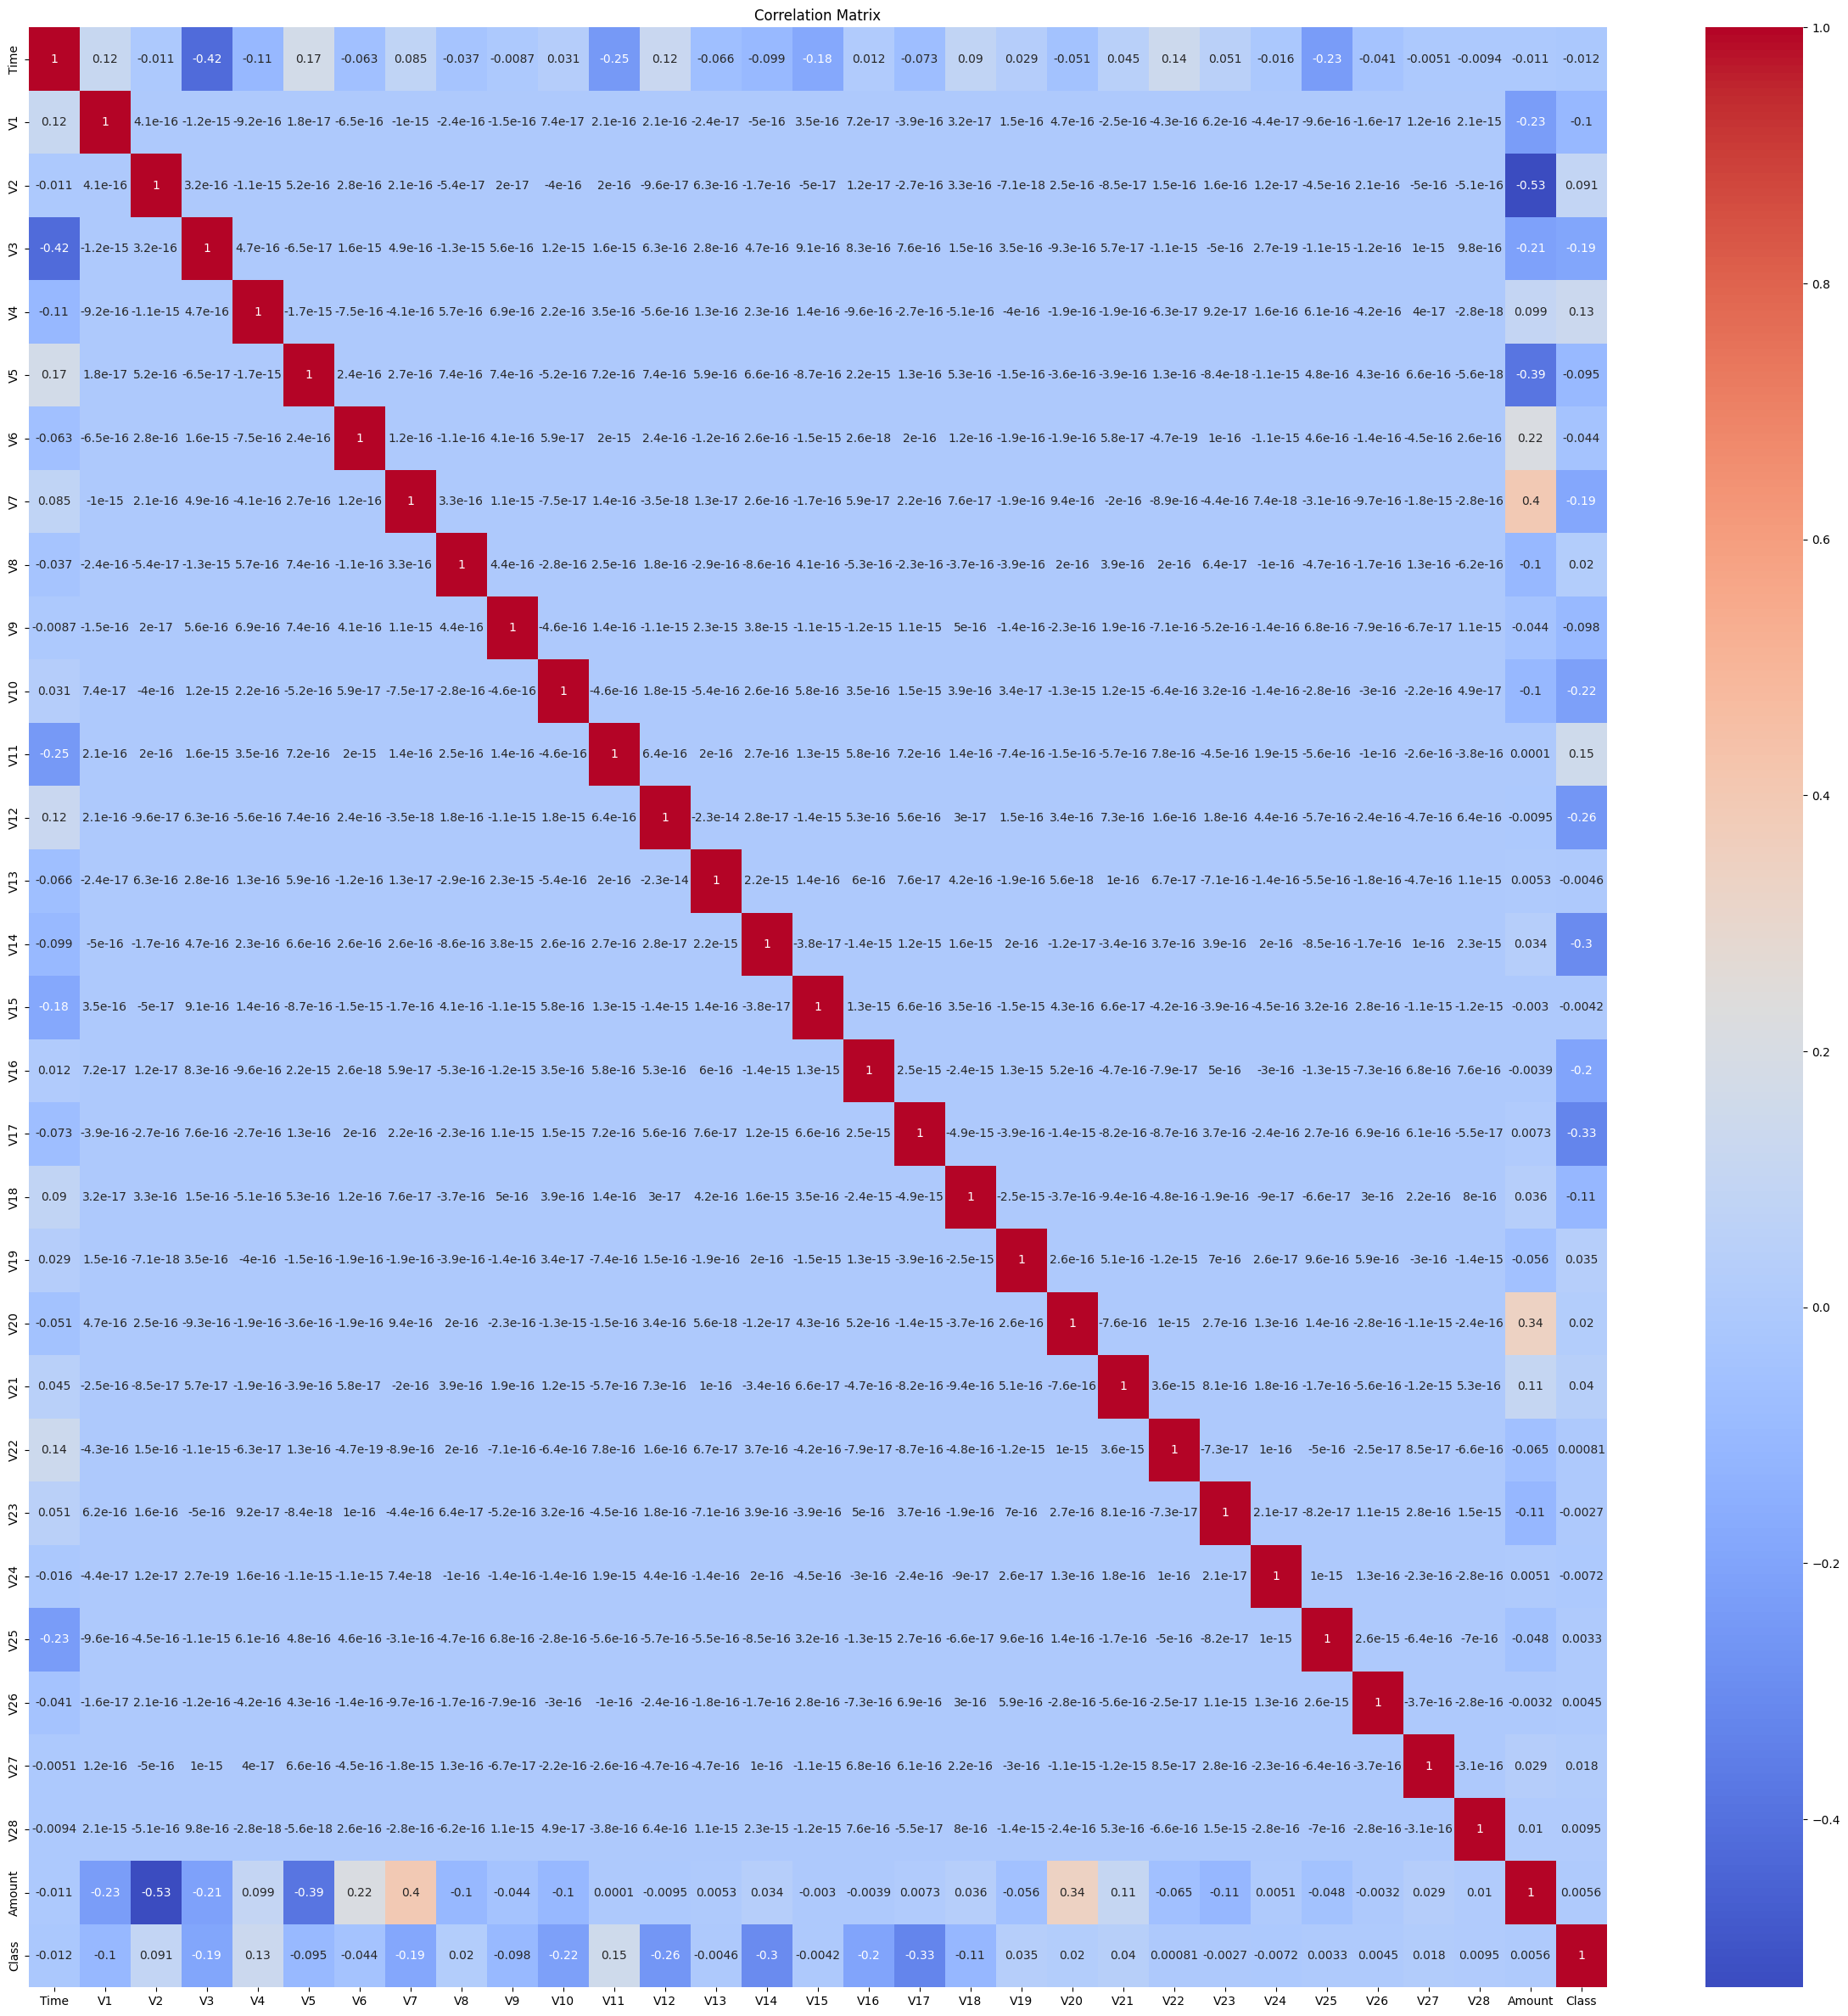

In [15]:
# Compute correlation matrix
plt.figure(figsize=(30, 30))
corr_matrix = cc.corr()

sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

There is no particularly strongly correlated variables, although some show weak correlations (Amount & V7, Amount & v20, Amount & V2, Time & V3, etc).

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

X = cc.drop('Class', axis=1)
y = cc['Class']

k_values = range(2, len(X) + 1)

# Initialize lists to store average accuracy and standard deviation
avg_accuracy = []
std_deviation = []

# Perform cross-validation for each value of k
for k in k_values:
    # Create a logistic regression model
    model = LogisticRegression(solver='lbfgs', max_iter=1000)

    # Perform cross-validation with k folds
    cv = StratifiedKFold(n_splits=k)
    scores = cross_val_score(model, X, y, cv=cv)

    # Calculate average accuracy and standard deviation
    avg_accuracy.append(scores.mean())
    std_deviation.append(scores.std())

# Plot the line chart
plt.figure(figsize=(8, 6))
plt.errorbar(k_values, avg_accuracy, yerr=std_deviation, marker='o', linestyle='-', capsize=4)
plt.title('Cross-Validation Performance')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()